In [1]:
import os, sys, pandas as pd, numpy as np, time
from heapq import heappush, heappop
from operator import itemgetter
from time import time

sys.path.insert(0, '/Users/icipriano/GIT/OMPy/')
import ompy

path =  "/Users/icipriano/GIT/OMPy/examples/Agricola/"
fpp = "Agricola5.fpp"
blocks = "Agricola5.blocks"
delay = "Agricola5.delay"
prob = "Agricola5.prob"
I = ompy.Instance()
I.load_graph(path+fpp, path+delay)
I.load_prob(path+prob)
I.load_blocks(path+blocks)
G = ompy.Digraph(path+fpp, path+delay)
S = ompy.Solution()
S.load(path+"/sols/Agricola5.lp.sol")
X=S.x.to_numpy()

from time import time

nactivities = I.numActivities()
nperiods = I.numPeriods()
nresources = I.numConstraints()

LP_sol=I.compute_objval(S)

nactivities = I.numActivities()
nperiods = I.numPeriods()
nresources = I.numConstraints()

L_rdv2=[]
L_plv2=[]
L_valv2=[]
L_met=[]



for i in range (10):
    for j in range (10):
        p=1+i/10
        q=1+j/10
        brd = ompy.input_bestfit(p,nperiods)
        bpl = ompy.input_bestfit(q,nperiods)
        bpfit_rd=ompy.best_fit_p(brd,X,nperiods,nactivities)
        bpfit_pl=ompy.best_fit_p(bpl,X,nperiods,nactivities)
        Sser=ompy.solve_serial_wp(bpfit_rd,bpfit_pl,I)
        Spar=ompy.solve_parallel_wp(bpfit_rd,bpfit_pl,I)
        L_rdv2.append(p)
        L_plv2.append(q)
        L_rdv2.append(p)
        L_plv2.append(q)
        LIsolpar=I.compute_objval(Spar)
        LIsolser=I.compute_objval(Sser)
        L_valv2.append(100*LIsolpar/LP_sol)
        L_met.append('Parallel')
        L_valv2.append(100*LIsolser/LP_sol)
        L_met.append('Serial')
        print(f"{100*LIsolpar/LP_sol}% LP [Parallel / release date = {p} - best fit / priority list =  {q} - best fit]")
        print(f"{100*LIsolser/LP_sol}% LP [Serial / release date = {p} - best fit / priority list =  {q} - best fit]")

pfit_tests = {
    'Method': L_met,'Rd': L_rdv2, 'Pl' : L_plv2, '%LP' : L_valv2
        }

df = pd.DataFrame(pfit_tests)

df     

94.73551157849808% LP [Parallel / release date = 1.0 - best fit / priority list =  1.0 - best fit]
93.97820735221615% LP [Serial / release date = 1.0 - best fit / priority list =  1.0 - best fit]
94.88026471376772% LP [Parallel / release date = 1.0 - best fit / priority list =  1.1 - best fit]
94.03475467663209% LP [Serial / release date = 1.0 - best fit / priority list =  1.1 - best fit]
94.9182083989735% LP [Parallel / release date = 1.0 - best fit / priority list =  1.2 - best fit]
93.95425186975766% LP [Serial / release date = 1.0 - best fit / priority list =  1.2 - best fit]
94.46561000528531% LP [Parallel / release date = 1.0 - best fit / priority list =  1.3 - best fit]
93.96536473382272% LP [Serial / release date = 1.0 - best fit / priority list =  1.3 - best fit]
94.29093302753826% LP [Parallel / release date = 1.0 - best fit / priority list =  1.4 - best fit]
93.7070331582494% LP [Serial / release date = 1.0 - best fit / priority list =  1.4 - best fit]
94.03281400990895% LP 

94.80914938908938% LP [Parallel / release date = 1.4 - best fit / priority list =  1.2 - best fit]
94.11159359763624% LP [Serial / release date = 1.4 - best fit / priority list =  1.2 - best fit]
94.39361849616886% LP [Parallel / release date = 1.4 - best fit / priority list =  1.3 - best fit]
93.75337492742658% LP [Serial / release date = 1.4 - best fit / priority list =  1.3 - best fit]
94.39644578481376% LP [Parallel / release date = 1.4 - best fit / priority list =  1.4 - best fit]
93.87727462858732% LP [Serial / release date = 1.4 - best fit / priority list =  1.4 - best fit]
94.33808741593782% LP [Parallel / release date = 1.4 - best fit / priority list =  1.5 - best fit]
93.48388897293205% LP [Serial / release date = 1.4 - best fit / priority list =  1.5 - best fit]
94.14296566447767% LP [Parallel / release date = 1.4 - best fit / priority list =  1.6 - best fit]
93.45278019396643% LP [Serial / release date = 1.4 - best fit / priority list =  1.6 - best fit]
94.09863992817807% L

94.39613806710892% LP [Parallel / release date = 1.8 - best fit / priority list =  1.4 - best fit]
93.44387626816366% LP [Serial / release date = 1.8 - best fit / priority list =  1.4 - best fit]
94.1545756254554% LP [Parallel / release date = 1.8 - best fit / priority list =  1.5 - best fit]
93.4750534549613% LP [Serial / release date = 1.8 - best fit / priority list =  1.5 - best fit]
94.2513205203411% LP [Parallel / release date = 1.8 - best fit / priority list =  1.6 - best fit]
93.49081269181463% LP [Serial / release date = 1.8 - best fit / priority list =  1.6 - best fit]
94.3211903523198% LP [Parallel / release date = 1.8 - best fit / priority list =  1.7 - best fit]
93.48178854688713% LP [Serial / release date = 1.8 - best fit / priority list =  1.7 - best fit]
94.19540038525787% LP [Parallel / release date = 1.8 - best fit / priority list =  1.8 - best fit]
93.40116411041721% LP [Serial / release date = 1.8 - best fit / priority list =  1.8 - best fit]
94.20087832459242% LP [P

,Method,Rd,Pl,%LP
0,Parallel,1.0,1.0,94.735512
1,Serial,1.0,1.0,93.978207
2,Parallel,1.0,1.1,94.880265
3,Serial,1.0,1.1,94.034755
4,Parallel,1.0,1.2,94.918208
...,...,...,...,...
195,Serial,1.9,1.7,93.475483
196,Parallel,1.9,1.8,94.207932
197,Serial,1.9,1.8,93.131615
198,Parallel,1.9,1.9,94.244337


In [4]:
df_ordenado = df.sort_values(by="%LP")
df_ordenado

,Method,Rd,Pl,%LP
59,Serial,1.2,1.9,92.818264
99,Serial,1.4,1.9,93.038160
19,Serial,1.0,1.9,93.073625
39,Serial,1.1,1.9,93.074697
119,Serial,1.5,1.9,93.083052
...,...,...,...,...
24,Parallel,1.1,1.2,94.954232
22,Parallel,1.1,1.1,94.981652
40,Parallel,1.2,1.0,95.002737
64,Parallel,1.3,1.2,95.060279


In [9]:
df.to_csv("/Users/icipriano/SharedFiles/UAI/Rtests/repor4_df.csv", index = False)

In [5]:
alpha_i = []

for i in range(0,100):
    alpha_i.append(ompy.alpha_points(X, nperiods, nactivities ,i/100))

In [18]:
bpl = ompy.input_bestfit(1.2,nperiods)
bpfit_pl=ompy.best_fit_p(bpl,X,nperiods,nactivities)

LIs=[]
best=0.0
best_alpha=0.0
aux_switch=-1

for i in range(0,100):  
    
    for j in range(100):
        
        bpl = ompy.input_bestfit(1+j/100,nperiods)
        bpfit_pl=ompy.best_fit_p(bpl,X,nperiods,nactivities)
        
        S=ompy.solve_parallel_wp(bpfit_pl, alpha_i[i], I)
        LIs.append(I.compute_objval(S))
        if LIs[-1]>best:
            best_alpha=i/100
            best=LIs[-1]
            aux_switch='bpfit,alpha'
            print(best*100/LP_sol,aux_switch,i,j)
                
        S=ompy.solve_parallel_wp(alpha_i[i],bpfit_pl, I)
        LIs.append(I.compute_objval(S))
    
        if LIs[-1]>best:
            best_alpha=i/100
            best=LIs[-1]
            aux_switch='alpha,bpfit'
            print(best*100/LP_sol,aux_switch,i,j)
            
        S=ompy.solve_parallel_wp(alpha_i[i],alpha_i[j], I)
        LIs.append(I.compute_objval(S))
    
        if LIs[-1]>best:
            best_alpha=i/100
            best=LIs[-1]
            aux_switch='alpha,alpha'
            print(best*100/LP_sol,aux_switch,i,j)

94.89924650018949 bpfit,alpha 0 0
94.94211169401375 bpfit,alpha 0 1
94.98335804352736 bpfit,alpha 0 25
95.33561766282511 alpha,bpfit 1 0
95.38754597758563 alpha,bpfit 1 1
95.40712876559962 alpha,bpfit 1 7
95.44377989539798 alpha,bpfit 1 8
95.58324602205872 alpha,bpfit 1 9
95.68106014781432 alpha,bpfit 1 10
95.71158677848027 alpha,bpfit 1 19
95.7426948051948 alpha,alpha 7 53
95.85882756103501 alpha,alpha 8 59
95.94699298540918 alpha,alpha 10 59
95.94699326750334 alpha,alpha 11 59


KeyboardInterrupt: 

In [22]:
L=[94.89924650018949,
94.94211169401375,
94.98335804352736,
95.33561766282511,
95.38754597758563,
95.40712876559962 ,
95.44377989539798,
95.58324602205872 ,
95.68106014781432 ,
95.71158677848027,
95.7426948051948 ,
95.85882756103501,
95.94699298540918 ,
95.94699326750334,
  96.76309480116274]

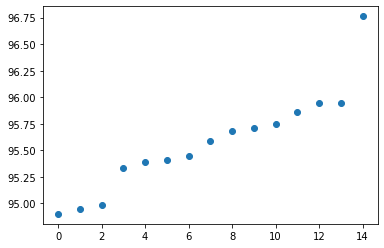

In [23]:
import numpy as np
from matplotlib import pyplot as plt

data = np.array([[i,L[i]] for i in range(len(L))])
x, y = data.T
plt.scatter(x,y)
plt.show()

In [12]:
2%2

0

In [13]:
5/2

2.5

In [24]:
import os, sys, pandas as pd, numpy as np, time
from heapq import heappush, heappop
from operator import itemgetter
from time import time

sys.path.insert(0, '/Users/icipriano/GIT/OMPy/')
import ompy

path =  "/Users/icipriano/GIT/OMPy/examples/Agricola/"
fpp = "Agricola20.fpp"
blocks = "Agricola20.blocks"
delay = "Agricola20.delay"
prob = "Agricola20.prob"
I = ompy.Instance()
I.load_graph(path+fpp, path+delay)
I.load_prob(path+prob)
I.load_blocks(path+blocks)
G = ompy.Digraph(path+fpp, path+delay)
S = ompy.Solution()
S.load(path+"/sols/Agricola20.lp.sol")
X=S.x.to_numpy()

from time import time

nactivities = I.numActivities()
nperiods = I.numPeriods()
nresources = I.numConstraints()

LP_sol=I.compute_objval(S)

nactivities = I.numActivities()
nperiods = I.numPeriods()
nresources = I.numConstraints()

L_rdv2=[]
L_plv2=[]
L_valv2=[]
L_met=[]



for i in range (10):
    for j in range (10):
        p=1+i/10
        q=1+j/10
        brd = ompy.input_bestfit(p,nperiods)
        bpl = ompy.input_bestfit(q,nperiods)
        bpfit_rd=ompy.best_fit_p(brd,X,nperiods,nactivities)
        bpfit_pl=ompy.best_fit_p(bpl,X,nperiods,nactivities)
        Sser=ompy.solve_serial_wp(bpfit_rd,bpfit_pl,I)
        Spar=ompy.solve_parallel_wp(bpfit_rd,bpfit_pl,I)
        L_rdv2.append(p)
        L_plv2.append(q)
        L_rdv2.append(p)
        L_plv2.append(q)
        LIsolpar=I.compute_objval(Spar)
        LIsolser=I.compute_objval(Sser)
        L_valv2.append(100*LIsolpar/LP_sol)
        L_met.append('Parallel')
        L_valv2.append(100*LIsolser/LP_sol)
        L_met.append('Serial')
        print(f"{100*LIsolpar/LP_sol}% LP [Parallel / release date = {p} - best fit / priority list =  {q} - best fit]")
        print(f"{100*LIsolser/LP_sol}% LP [Serial / release date = {p} - best fit / priority list =  {q} - best fit]")

pfit_tests = {
    'Method': L_met,'Rd': L_rdv2, 'Pl' : L_plv2, '%LP' : L_valv2
        }

dfAgricola20 = pd.DataFrame(pfit_tests)

dfAgricola20     

96.59132006174868% LP [Parallel / release date = 1.0 - best fit / priority list =  1.0 - best fit]
96.50725082580388% LP [Serial / release date = 1.0 - best fit / priority list =  1.0 - best fit]
96.59814478722934% LP [Parallel / release date = 1.0 - best fit / priority list =  1.1 - best fit]
96.55488449373166% LP [Serial / release date = 1.0 - best fit / priority list =  1.1 - best fit]
96.76277555353855% LP [Parallel / release date = 1.0 - best fit / priority list =  1.2 - best fit]
96.65352331769459% LP [Serial / release date = 1.0 - best fit / priority list =  1.2 - best fit]
96.6535363243268% LP [Parallel / release date = 1.0 - best fit / priority list =  1.3 - best fit]
96.19163869719146% LP [Serial / release date = 1.0 - best fit / priority list =  1.3 - best fit]
96.18481880811194% LP [Parallel / release date = 1.0 - best fit / priority list =  1.4 - best fit]
96.0937971750873% LP [Serial / release date = 1.0 - best fit / priority list =  1.4 - best fit]
95.99064772620349% LP 

96.03286312227696% LP [Parallel / release date = 1.4 - best fit / priority list =  1.2 - best fit]
95.9976511637498% LP [Serial / release date = 1.4 - best fit / priority list =  1.2 - best fit]
95.84685926628758% LP [Parallel / release date = 1.4 - best fit / priority list =  1.3 - best fit]
95.70046285922577% LP [Serial / release date = 1.4 - best fit / priority list =  1.3 - best fit]
95.8116614882764% LP [Parallel / release date = 1.4 - best fit / priority list =  1.4 - best fit]
95.50190943441518% LP [Serial / release date = 1.4 - best fit / priority list =  1.4 - best fit]
95.74935225410343% LP [Parallel / release date = 1.4 - best fit / priority list =  1.5 - best fit]
95.57285403935597% LP [Serial / release date = 1.4 - best fit / priority list =  1.5 - best fit]
95.60278042185054% LP [Parallel / release date = 1.4 - best fit / priority list =  1.6 - best fit]
95.42856409629215% LP [Serial / release date = 1.4 - best fit / priority list =  1.6 - best fit]
95.47090786829506% LP 

95.53555003212354% LP [Parallel / release date = 1.8 - best fit / priority list =  1.4 - best fit]
95.58183495455127% LP [Serial / release date = 1.8 - best fit / priority list =  1.4 - best fit]
95.54904166615042% LP [Parallel / release date = 1.8 - best fit / priority list =  1.5 - best fit]
95.49035109305208% LP [Serial / release date = 1.8 - best fit / priority list =  1.5 - best fit]
95.48423642638815% LP [Parallel / release date = 1.8 - best fit / priority list =  1.6 - best fit]
95.59262275860563% LP [Serial / release date = 1.8 - best fit / priority list =  1.6 - best fit]
95.49127432916204% LP [Parallel / release date = 1.8 - best fit / priority list =  1.7 - best fit]
95.5461885651173% LP [Serial / release date = 1.8 - best fit / priority list =  1.7 - best fit]
95.6319927073682% LP [Parallel / release date = 1.8 - best fit / priority list =  1.8 - best fit]
95.60367820816029% LP [Serial / release date = 1.8 - best fit / priority list =  1.8 - best fit]
95.60240036524013% LP 

,Method,Rd,Pl,%LP
0,Parallel,1.0,1.0,96.591320
1,Serial,1.0,1.0,96.507251
2,Parallel,1.0,1.1,96.598145
3,Serial,1.0,1.1,96.554884
4,Parallel,1.0,1.2,96.762776
...,...,...,...,...
195,Serial,1.9,1.7,95.398767
196,Parallel,1.9,1.8,95.583355
197,Serial,1.9,1.8,95.570255
198,Parallel,1.9,1.9,95.626858


In [25]:
dfAgricola20.to_csv("/Users/icipriano/SharedFiles/UAI/Rtests/repor4_dfAgricola20.csv", index = False)